# Unsupervised Learning
## Principal Component Analysis - Sklearn Implementation

Author: Bingchen Wang

Last Updated: 17 Oct, 2022

---
<nav>
    <a href="../../Machine%20Learning.ipynb">Machine Learning</a> |
    <a href="../Unsupervised Learning.ipynb">Unsupervised Learning</a> |
</nav>

---

## Content

- [Import packages](#IP)
- [Understanding the dataset](#UD)
- [Running PCA on the handwritten digits 9](#PCA)
- [Running PCA on the uncorrelated data](#PCA_unc)
- [Visualizing the principal components](#PCA_vis)
- [Running PCA on the entire handwritten digits dataset](#PCA_ent)

<a name = "IP"></a>
### Import packages

In [45]:
import numpy as np
from sklearn.decomposition import PCA
from keras.datasets import mnist
import matplotlib.pyplot as plt

<a name = "UD"></a>
### Understanding the dataset

In [2]:
(X, Y), (_,_) = mnist.load_data()
X = 255 - X #turn the background white

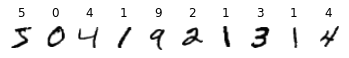

In [3]:
fig, axes = plt.subplots(1,10)
count = 0
for i in range(10):
    axes[i].imshow(X[i], cmap = plt.get_cmap('gray'))
    axes[i].set_axis_off()
    axes[i].set_title(Y[i])
plt.show()

nines = X[Y==9]

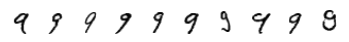

In [4]:
fig, axes = plt.subplots(1,10)
for i in range(10):
    axes[i].imshow(nines[i], cmap = plt.get_cmap('gray'))
    axes[i].set_axis_off()
plt.show()

<a name = "PCA"></a>
### Running PCA on handwritten digits 9

In [5]:
nines_flattened = nines.reshape(-1,nines.shape[1]*nines.shape[2])

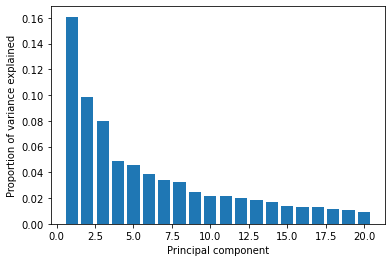

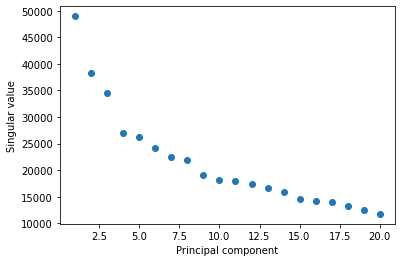

In [6]:
pca = PCA(n_components = 20)
nines_2pcs = pca.fit_transform(nines_flattened)[:,:2]
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_
plt.bar(np.arange(20)+1, explained_variance)
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.show()

plt.scatter(np.arange(20)+1, singular_values)
plt.xlabel('Principal component')
plt.ylabel('Singular value')
plt.show()

<a name = "PCA_unc"></a>
### Running PCA on uncorrelated data

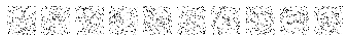

In [7]:
# Check how the PCA would work for uncorrelated data
np.random.seed(10000)
unrelated = nines_flattened.flatten()
np.random.shuffle(unrelated)
unrelated = unrelated.reshape(-1,nines.shape[1]*nines.shape[2])
unrelated_images = unrelated.reshape(-1,nines.shape[1],nines.shape[2])
fig, axes = plt.subplots(1,10)
for i in range(10):
    axes[i].imshow(unrelated_images[i], cmap = plt.get_cmap('gray'))
    axes[i].set_axis_off()
plt.show()

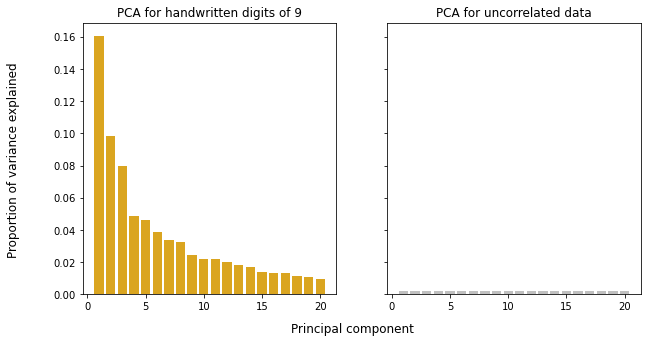

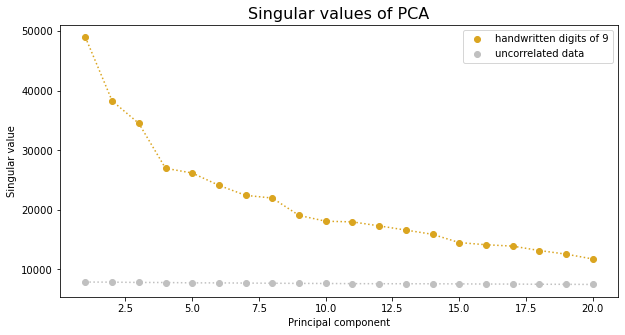

In [8]:
pca2 = PCA(n_components = 20)
pca2.fit(unrelated)
explained_variance2 = pca2.explained_variance_ratio_
singular_values2 = pca2.singular_values_

fig, ax = plt.subplots(1,2, figsize = (10, 5), sharey=True)
ax[0].bar(np.arange(20)+1, explained_variance, color = "goldenrod")
ax[0].set_title('PCA for handwritten digits of 9')
ax[1].bar(np.arange(20)+1, explained_variance2, color = "silver")
ax[1].set_title('PCA for uncorrelated data')
fig.supxlabel('Principal component')
fig.supylabel('Proportion of variance explained')
plt.show()

plt.figure(figsize = (10, 5))
plt.scatter(np.arange(20)+1, singular_values, color = "goldenrod", label = "handwritten digits of 9")
plt.plot(np.arange(20)+1, singular_values, color = "goldenrod",linestyle="dotted")
plt.scatter(np.arange(20)+1, singular_values2, color = "silver", label = "uncorrelated data")
plt.plot(np.arange(20)+1, singular_values2, color = "silver",linestyle="dotted")
plt.xlabel('Principal component')
plt.ylabel('Singular value')
plt.title("Singular values of PCA", fontsize= 16)
plt.legend()
plt.show()

<a name = "PCA_vis"></a>
### Visualizing the principal components
Focus on the first two principal components.

In [9]:
quantiles = np.quantile(nines_2pcs, [0.05, 0.25, 0.5, 0.75, 0.95], axis = 0)
pc1_quantiles, pc2_quantiles = np.meshgrid(quantiles[:,0],quantiles[:,1])
pc1_quantiles = pc1_quantiles.flatten()
pc2_quantiles = pc2_quantiles.flatten()
ref_points = np.array([[pc1_quantiles[i], pc2_quantiles[i]] for i in range(len(pc1_quantiles))])
print(ref_points.shape)

(25, 2)


In [10]:
ref_points_reshaped = ref_points.reshape(-1,1,2)
closest_points = np.argmin(np.linalg.norm(nines_2pcs - ref_points_reshaped, axis =2), axis = 1)

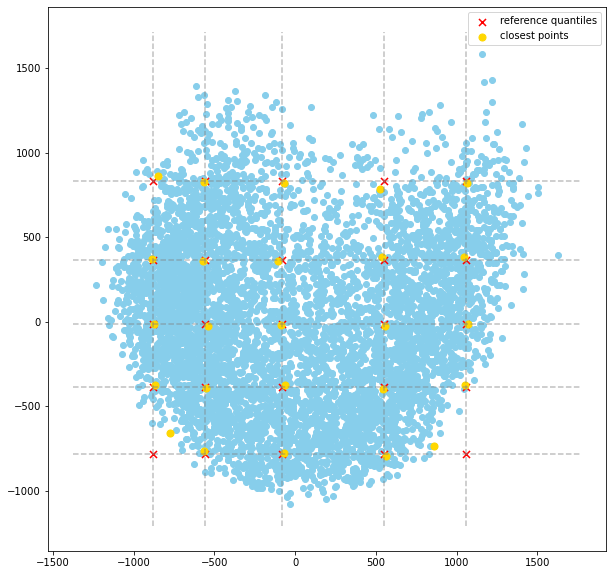

In [11]:
plt.figure(figsize = (10,10))
plt.scatter(nines_2pcs[:,0],nines_2pcs[:,1], color = 'skyblue')
x_min, x_max, y_min, y_max = plt.axis()
plt.vlines(x=quantiles[:,0], ymin = y_min, ymax = y_max, color='gray', linestyle='dashed', alpha = 0.5)
plt.hlines(y=quantiles[:,1], xmin = x_min, xmax = x_max, color='gray', linestyle='dashed', alpha = 0.5)
plt.scatter(ref_points[:,0], ref_points[:,1], color = 'red', marker = "x", s = 50, label = "reference quantiles")
plt.scatter(nines_2pcs[closest_points,0], nines_2pcs[closest_points,1], color = 'gold', marker = "o", s = 50, label = "closest points")
plt.legend()
plt.show()

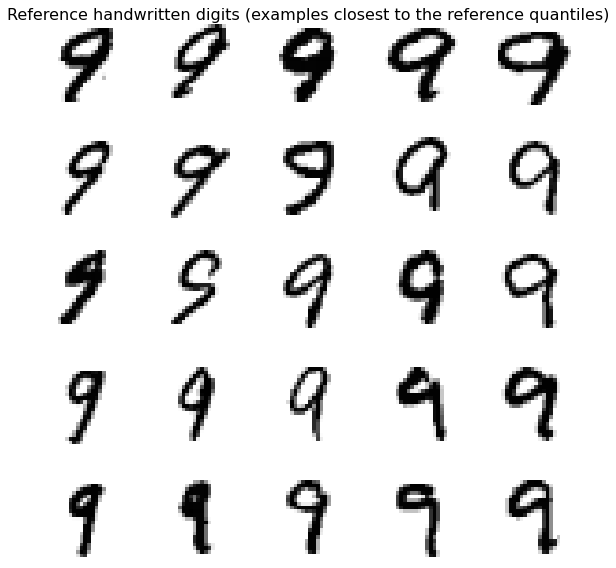

In [13]:
fig , ax = plt.subplots(5,5, figsize = (8,8))
rcount, ccount = 4,0
for i in range(len(closest_points)):
    ax[rcount, ccount].imshow(nines[closest_points[i]], cmap = plt.get_cmap('gray'))
    ax[rcount, ccount].axis("off")
    if ccount == 4:
        rcount -= 1
        ccount = 0
    else:
        ccount +=1
    
plt.tight_layout()
plt.suptitle("Reference handwritten digits (examples closest to the reference quantiles)", fontsize = 16)
plt.show()

<a name = "PCA_ent"></a>
### Running PCA on the entire handwritten digits dataset

In [14]:
X_flattened = X.reshape(-1, X.shape[1]*X.shape[2])

In [35]:
pca_entire = PCA(n_components = 20)
entire_3pcs = pca_entire.fit_transform(X_flattened)[:,:3]
entire_explained_variance = pca_entire.explained_variance_ratio_
entire_singular_values = pca_entire.singular_values_

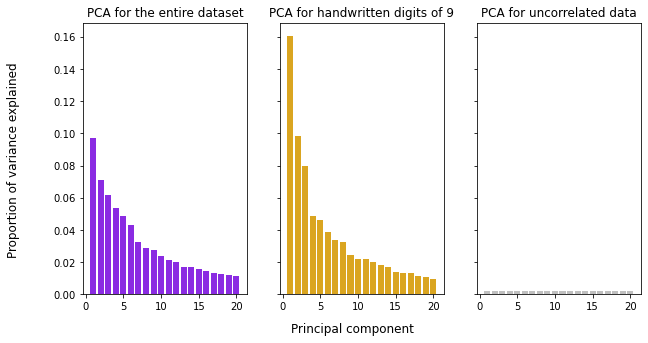

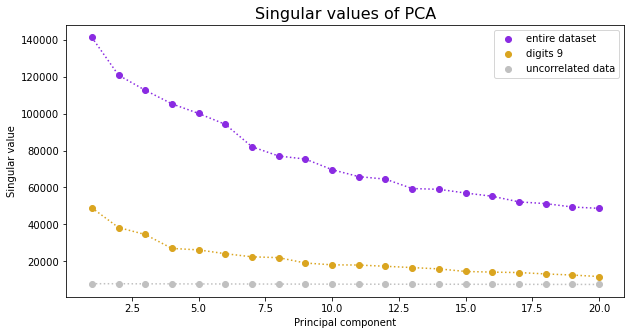

In [36]:
fig, ax = plt.subplots(1,3, figsize = (10, 5), sharey=True)
ax[0].bar(np.arange(20)+1, entire_explained_variance, color = "blueviolet")
ax[0].set_title('PCA for the entire dataset')
ax[1].bar(np.arange(20)+1, explained_variance, color = "goldenrod")
ax[1].set_title('PCA for handwritten digits of 9')
ax[2].bar(np.arange(20)+1, explained_variance2, color = "silver")
ax[2].set_title('PCA for uncorrelated data')
fig.supxlabel('Principal component')
fig.supylabel('Proportion of variance explained')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(np.arange(20)+1, entire_singular_values, color = "blueviolet", label = "entire dataset")
plt.plot(np.arange(20)+1, entire_singular_values, color = "blueviolet",linestyle="dotted")
plt.scatter(np.arange(20)+1, singular_values, color = "goldenrod", label = "digits 9")
plt.plot(np.arange(20)+1, singular_values, color = "goldenrod",linestyle="dotted")
plt.scatter(np.arange(20)+1, singular_values2, color = "silver", label = "uncorrelated data")
plt.plot(np.arange(20)+1, singular_values2, color = "silver",linestyle="dotted")
plt.xlabel('Principal component')
plt.ylabel('Singular value')
plt.title("Singular values of PCA", fontsize= 16)
plt.legend()
plt.show()

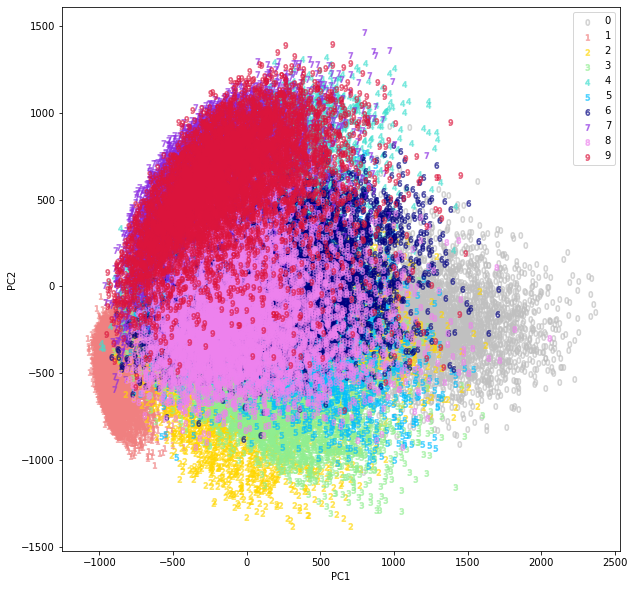

In [37]:
plt.figure(figsize = (10,10))
palatte = ['silver','lightcoral', 'gold', 'lightgreen','turquoise','deepskyblue','navy','blueviolet', 'violet', 'crimson']
for i in range(10):
    plt.scatter(entire_3pcs[Y== i,0],entire_3pcs[Y== i,1], color = palatte[i], label = f"{i}", marker = f"${i}$", alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()    
plt.show()

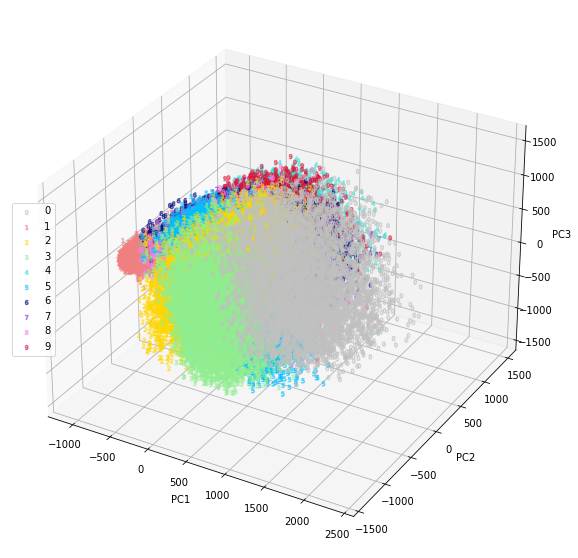

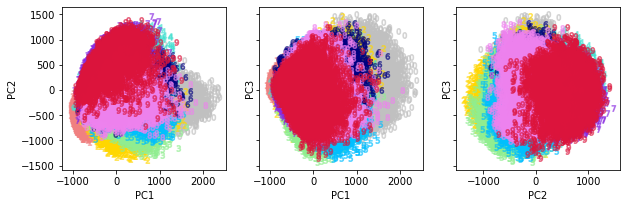

In [72]:
ax = plt.figure(figsize = (10,10)).add_subplot(projection = '3d')

for i in range(10):
    ax.scatter(entire_3pcs[Y== i,0],entire_3pcs[Y== i,1], entire_3pcs[Y== i,2], color = palatte[i], label = f"{i}", marker = f"${i}$", alpha = 0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(loc = "center left", fontsize = 'medium') 
plt.show()



fig, ax = plt.subplots(1,3, figsize = (10,3), sharey = True)

for i in range(10):
    ax[0].scatter(entire_3pcs[Y== i,0],entire_3pcs[Y== i,1], color = palatte[i], label = f"{i}", marker = f"${i}$", alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
    
for i in range(10):
    ax[1].scatter(entire_3pcs[Y== i,0],entire_3pcs[Y== i,2], color = palatte[i], label = f"{i}", marker = f"${i}$", alpha = 0.5)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')

for i in range(10):
    ax[2].scatter(entire_3pcs[Y== i,1],entire_3pcs[Y== i,2], color = palatte[i], label = f"{i}", marker = f"${i}$", alpha = 0.5)
ax[2].set_xlabel('PC2')
ax[2].set_ylabel('PC3')
plt.show()